In [162]:
# !git clone https://github.com/alifnurhadi/Visualization_Alif.git

# Memindahkan file download ke dalam folder ini

In [163]:
# !move "C:\Users\alifn\Downloads\UGREEN Official Store - Wawasan Pembeli - 20241001 - 20241031.xlsx" .

In [164]:
import polars as pl
import numpy as np

In [165]:
table1 = {
    'skip_rows':1,
    'n_rows':1
}

table2 = {
    'skip_rows':5
}



In [178]:
harian = pl.read_csv('Ugreen.csv',skip_rows=1)
harian = harian.with_columns([
    pl.col('Followers').str.replace(pattern=',',value='').cast(pl.Int64),
    pl.col(['Pembeli','Pembeli baru']).str.replace(pattern=',',value='').cast(pl.Int64),
    pl.col('Waktu').str.strptime(pl.Date,format='%d/%m/%Y')
    ])
harian.head()

Waktu,Pembeli,Laki-Laki,Perempuan,Tidak disebutkan,Pembeli baru,Pembeli reguler,Pembeli setia,< 17 tahun,18 - 23 tahun,24 - 34 tahun,35 - 44 tahun,> 45 tahun,Followers
date,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2024-10-01,959,557,122,280,751,149,59,4,65,426,199,103,43753
2024-10-02,899,532,119,248,704,140,55,2,68,389,177,114,43846
2024-10-03,759,454,78,227,572,136,51,2,59,322,137,99,43939
2024-10-04,707,436,87,184,540,116,51,3,49,298,159,88,44012
2024-10-05,528,311,49,168,409,90,29,2,42,203,109,83,44070


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
daily = harian.to_pandas()

# Follower - Barang Terbeli

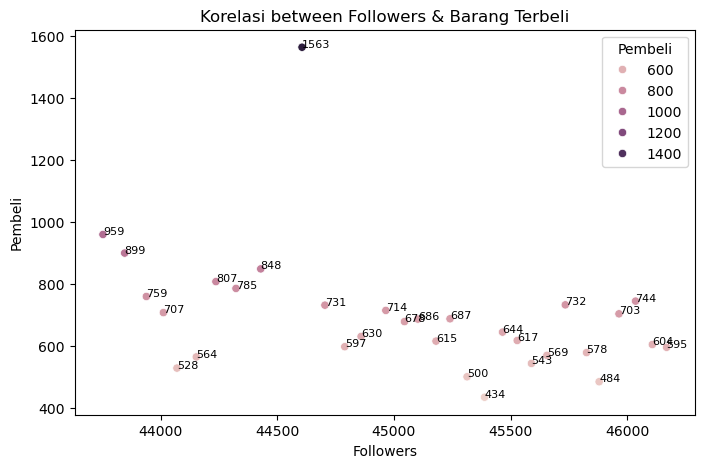

In [190]:
daily = harian.to_pandas()
plt.figure(figsize=(8,5))

sns.scatterplot(data=harian,y=harian['Pembeli'],x=harian['Followers'],hue=harian['Pembeli'])

for i in range(len(daily)):
    plt.text(x=daily['Followers'][i],  # X-coordinate of the point
        y=daily['Pembeli'][i],    # Y-coordinate of the point
        s=str(daily['Pembeli'][i]),  # The label text (you can change this to something else)
        fontsize=8, 
        color='black') # Text color

plt.title('Korelasi between Followers & Barang Terbeli')

plt.show()

## Findings

i want to show here as followers goes up did not represent any help at boosting revenue, suggesting that we dont have to rely at followers to generates revenue

In [168]:
kecil = sum(harian['< 17 tahun'].to_list())/100
muda = sum(harian['18 - 23 tahun'].to_list())/100
remaja = sum(harian['24 - 34 tahun'].to_list())/100
dewasa = sum(harian['35 - 44 tahun'].to_list())/100
lanjut = sum(harian['> 45 tahun'].to_list())/100

# Age group Proportion in Sales

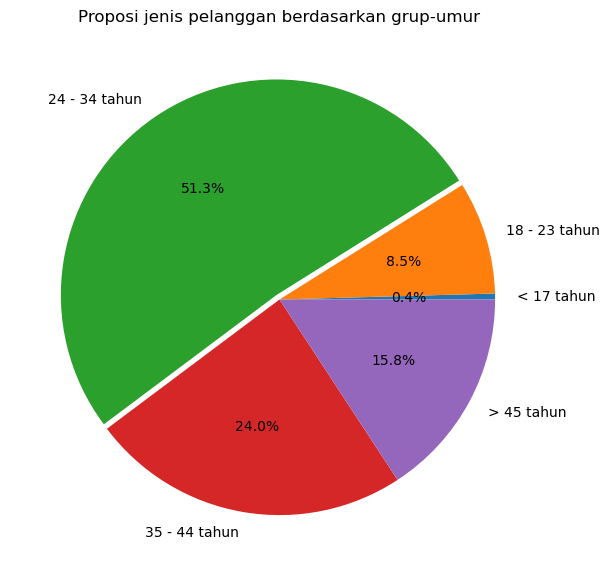

In [192]:
plt.figure(figsize=(10,7))

plt.pie(
    [kecil,muda,remaja,dewasa,lanjut],
    labels=['< 17 tahun','18 - 23 tahun','24 - 34 tahun','35 - 44 tahun','> 45 tahun'],
    explode=(0 , 0, 0.025 , 0 ,0),
    autopct='%1.1f%%'
    )

plt.title('Proposi jenis pelanggan berdasarkan grup-umur')

plt.show()

## Findings:

- over 50% early adult age group contributing to the sales generated followed by adult age-group

# Gender in Sales-day

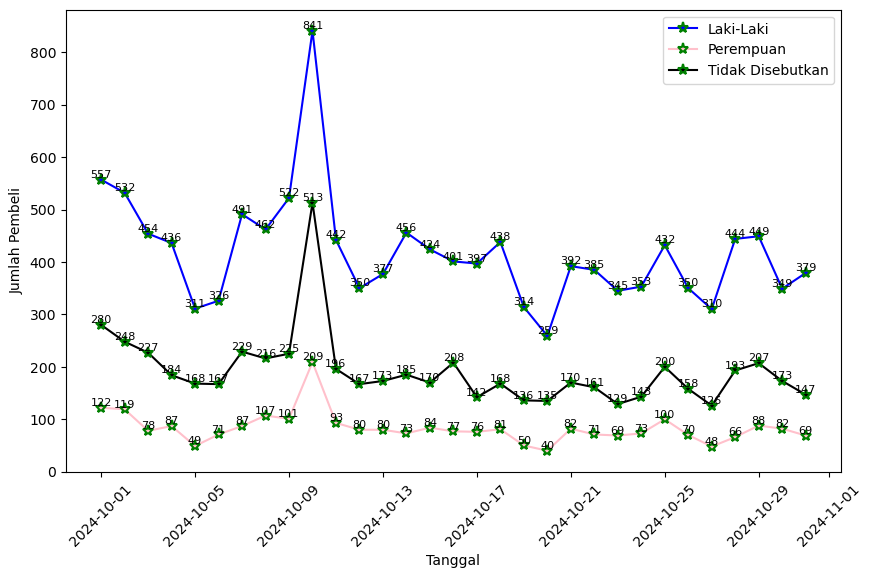

In [194]:
waktu = harian['Waktu'].to_list()
laki =  harian['Laki-Laki'].to_list()
perempuan = harian['Perempuan'].to_list()
not_say =  harian['Tidak disebutkan'].to_list()


plt.figure(figsize=(10,6))

gender = [laki, perempuan, not_say]
labels = ["Laki-Laki", "Perempuan", "Tidak Disebutkan"]
colors = ['blue', 'pink', 'black']


for jenis, label, color in zip(gender, labels, colors):
    # Adding markers with edge color and width
    plt.plot(waktu, jenis, color=color, marker='*', markersize=8, 
             markeredgecolor='green', markeredgewidth=1.5, label=label)
    
    # Adding labels for each data point
    for x, y in zip(waktu, jenis):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pembeli')

plt.xticks(rotation=45)

plt.legend()
plt.show()

## Findings:

- our typical customer is mostly men centric while women isn't that pop here, while we need to findout what are the detail section of what gender are there on the cust who's not declare their gender(not mentioned)

# Overal day to day sales

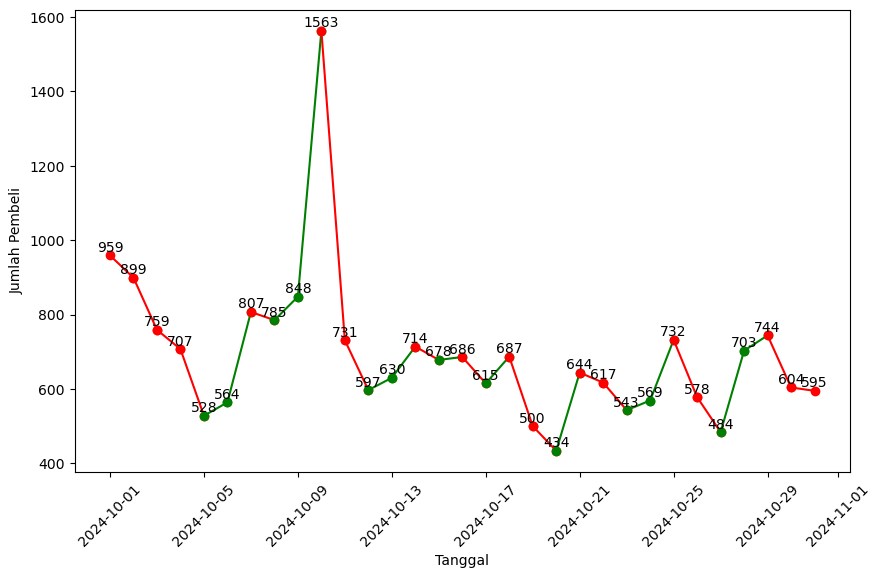

In [171]:
waktu = harian['Waktu'].to_list()
pembeli = harian['Pembeli'].to_list()


plt.figure(figsize=(10,6))
for i in range(1, len(pembeli)):
    if pembeli[i] > pembeli[i - 1]:
        color = 'green'  # Upward trend
    else:
        color = 'red'    # Downward trend
    
    plt.plot(waktu[i-1:i+1], pembeli[i-1:i+1], color=color, marker='o')

for i in range(len(pembeli)):  # Loop through the number of points
    plt.text(waktu[i], pembeli[i] + 2, str(pembeli[i]), ha='center', va='bottom')  # Add label


plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pembeli')

plt.xticks(rotation=45)
plt.show()

## findings

- sales goes rallies start at first of 2nd week of a month then goes down after that ( quite stagnant)

# Visualisasi Kota

In [177]:
kota = pl.read_excel(
        source='Ugreen.xlsx',
        sheet_name='Summary',
        read_options=table2,
        engine='calamine'
    )

nama_kolom = ('Kota','Pembeli','Pesanan','Barang','Nilai Pesanan','% Nilai Pesanan')
kota = kota.drop(['Umur' , '_1'])
for i, col in enumerate(kota.columns):
    kota = kota.rename({col:nama_kolom[i]})


In [174]:
top_kota =  kota\
    .sort("Nilai Pesanan", descending=True).head(5)
least_kota =  kota\
    .sort("Nilai Pesanan", descending=True).tail(5)

# 2. Calculate the average of 'Nilai Pesanan' and 'Pesanan' for each city

top_kota = top_kota.with_columns(
    ((pl.col("Nilai Pesanan") /pl.col("Pesanan"))).alias("Avg")
)
least_kota = least_kota.with_columns(
    ((pl.col("Nilai Pesanan") /pl.col("Pesanan"))).alias("Avg")
)

In [175]:
# 3. Extract columns as lists for plotting for top and least
kota = top_kota["Kota"].to_list()
nilai_pesanan = top_kota["Nilai Pesanan"].to_list()
pesanan = top_kota["Pesanan"].to_list()
avg = top_kota["Avg"].to_list()

# 3.1 Extract columns as lists for plotting for top and least
v2_kota = least_kota["Kota"].to_list()
v2_nilai_pesanan = least_kota["Nilai Pesanan"].to_list()
v2_pesanan = least_kota["Pesanan"].to_list()
v2_avg = least_kota["Avg"].to_list()

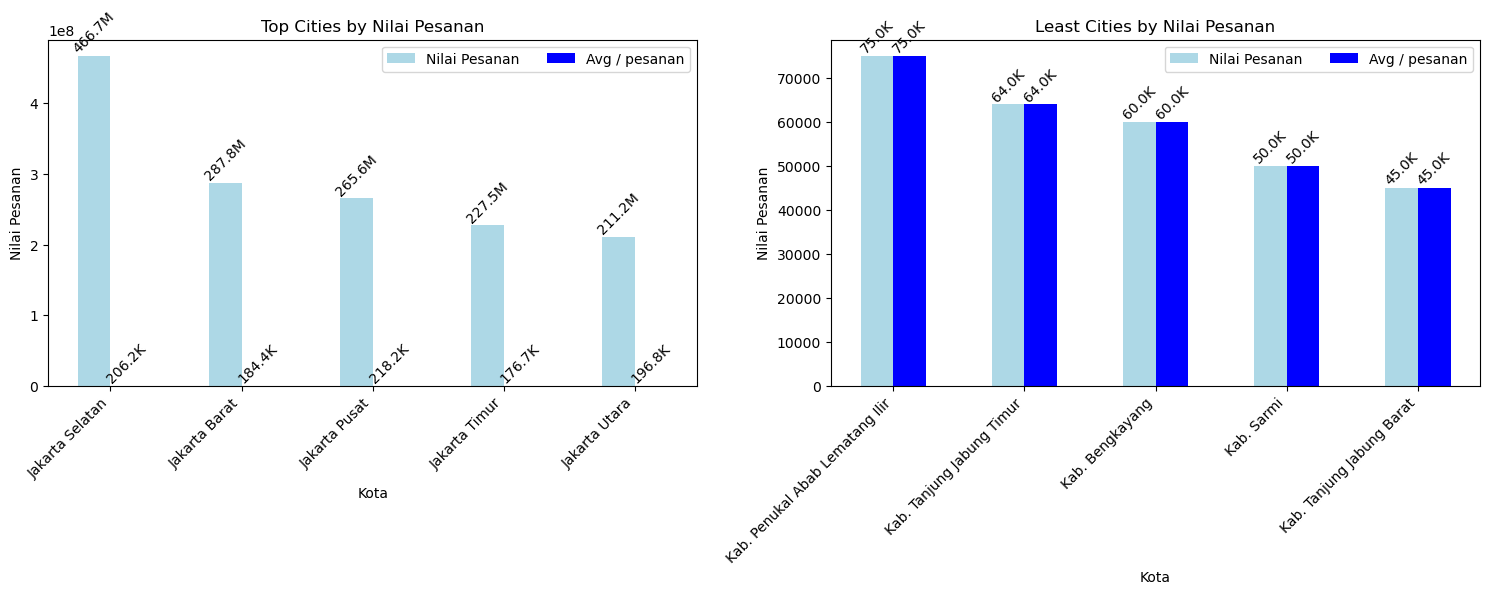

In [176]:
# Create subplots with more width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Reduce bar width and spacing
bar_width = 0.25
x_top = np.arange(len(kota)) # for positioning in the figure plot
x_least = np.arange(len(v2_kota)) # for positioning in the figure plot

# Plot bars with same scale for first subplot
bars1 = ax1.bar(x_top - bar_width/2, nilai_pesanan, bar_width, label='Nilai Pesanan', color='lightblue')
bars3 = ax1.bar(x_top + bar_width/2, avg, bar_width, label='Avg / pesanan', color='blue')

# Add value labels
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        if height >= 1e6:  # If value is in millions
            value_text = f'{height/1e6:.1f}M'
        elif height >= 1e3:  # If value is in thousands
            value_text = f'{height/1e3:.1f}K'
        else:
            value_text = f'{height:.1f}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
                value_text,
                ha='center', va='bottom', rotation=45)

autolabel(bars1, ax1)
autolabel(bars3, ax1)

# Plot bars with same scale for second subplot
bars4 = ax2.bar(x_least - bar_width/2, v2_nilai_pesanan, bar_width, label='Nilai Pesanan', color='lightblue')
bars6 = ax2.bar(x_least + bar_width/2, v2_avg, bar_width, label='Avg / pesanan', color='blue')

# Add value labels for second subplot
autolabel(bars4, ax2)
autolabel(bars6, ax2)

# Customize first subplot
ax1.set_xlabel('Kota')
ax1.set_ylabel('Nilai Pesanan')
ax1.set_title('Top Cities by Nilai Pesanan')
ax1.set_xticks(x_top)
ax1.set_xticklabels(kota, rotation=45, ha='right')
ax1.legend(loc='best', ncols= len(x_least))

# Customize second subplot
ax2.set_xlabel('Kota')
ax2.set_ylabel('Nilai Pesanan')
ax2.set_title('Least Cities by Nilai Pesanan')
ax2.set_xticks(x_least)
ax2.set_xticklabels(v2_kota, rotation=45, ha='right')
ax2.legend(loc='best',  ncols= len(x_least) )

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show plot
plt.show()

## Findings:

- jakarta as a cities remain top cities revenue generator for our company.
- jakarta pusat became the highest avg / sales while it's not at rank 1 in the list.
- other cities like tier 3 cities still generate revenue but really small company to the gigantic revenue from other cities.